In [34]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import MaxNLocator
from sklearn.metrics import r2_score as R2_score

In [3]:
data = fetch_california_housing()

In [4]:
X = data.data
y = data.target.reshape(-1, 1)

In [5]:
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=2)

In [8]:
print(X_train.shape, X_val.shape, X_test.shape)

(10113, 8) (4335, 8) (6192, 8)


In [9]:
print(X_train.mean(axis=0).round(2), X_train.std(axis=0).round(2))

[ 3.86000e+00  2.86800e+01  5.41000e+00  1.09000e+00  1.42757e+03
  3.21000e+00  3.56200e+01 -1.19570e+02] [1.88000e+00 1.25600e+01 2.46000e+00 4.50000e-01 1.15249e+03 1.48000e+01
 2.13000e+00 2.01000e+00]


In [12]:
sc_x = StandardScaler()
sc_x.fit(X_train)
X_train_scaled = sc_x.transform(X_train)
X_val_scaled = sc_x.transform(X_val)
X_test_scaled = sc_x.transform(X_test)


In [13]:
print(X_train_scaled.mean(axis=0).round(2), X_train_scaled.std(axis=0).round(2))

[ 0.  0. -0.  0.  0.  0.  0. -0.] [1. 1. 1. 1. 1. 1. 1. 1.]


In [14]:
print(y_train.mean(axis=0).round(2), y_train.std(axis=0).round(2))

[2.08] [1.15]


In [15]:
sc_y = StandardScaler()
sc_y.fit(y_train)
y_train_scaled = sc_y.transform(y_train)
y_val_scaled = sc_y.transform(y_val)
y_test_scaled = sc_y.transform(y_test)

In [16]:
print(y_train_scaled.mean(axis=0).round(2), y_train_scaled.std(axis=0).round(2))

[-0.] [1.]


In [23]:
model = keras.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(units=5, activation='relu', name="Densa_Oculta"),
    layers.Dense(units=1, activation='linear', name="Salida")
])

In [24]:
model.compile(optimizer='rmsprop', loss='mse')

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Densa_Oculta (Dense)            │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Salida (Dense)                  │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
lista_callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="best_model.keras",monitor="val_loss", save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
]

In [27]:
historia = model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=64, validation_data=(X_val_scaled, y_val_scaled), callbacks=lista_callbacks)

Epoch 1/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 2.2688 - val_loss: 1.6828
Epoch 2/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 1.5350 - val_loss: 1.0496
Epoch 3/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 0.8033 - val_loss: 0.7521
Epoch 4/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - loss: 0.8016 - val_loss: 0.6075
Epoch 5/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 0.5557 - val_loss: 0.5207
Epoch 6/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 0.6169 - val_loss: 0.4701
Epoch 7/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 0.5099 - val_loss: 0.4384
Epoch 8/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 0.4358 - val_loss: 0.4117
Epoch 9/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.4831 - val_loss: 0.3964
Epoch 10/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4065 - val_loss: 0.3868
Epoch 11/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - loss: 0.3752 - val_loss: 0.3797
Epoch 12/100
159/159 

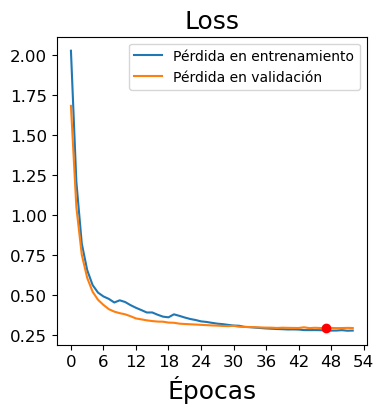

In [29]:
f = plt.figure(figsize=(4, 4))
h = historia.history
mejor_epoca = np.argmin(h['val_loss'])
plt.plot(h['loss'], label='Pérdida en entrenamiento')
plt.plot(h['val_loss'], label='Pérdida en validación')
plt.plot(mejor_epoca, h['val_loss'][mejor_epoca], 'or')
plt.title('Loss',fontsize=18)
plt.xlabel('Épocas',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
f.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

In [30]:
model = keras.models.load_model("best_model.keras")

In [31]:
print(model.predict(X_test_scaled[:5]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
[[ 0.69095415]
 [-1.0713596 ]
 [ 0.01686469]
 [-0.4159647 ]
 [ 0.922992  ]]


In [32]:
print(sc_y.inverse_transform(model.predict(X_test_scaled[:5])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[2.8758142]
 [0.8447725]
 [2.0989356]
 [1.6001059]
 [3.1432345]]


In [35]:
y_train_pred = sc_y.inverse_transform(model.predict(X_train_scaled))
R2_tr = R2_score(y_train, y_train_pred)
print(f"R2 en entrenamiento: {R2_tr:.2f}")

317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step
R2 en entrenamiento: 0.72


In [36]:
y_val_pred = sc_y.inverse_transform(model.predict(X_val_scaled))
R2_val = R2_score(y_val, y_val_pred)
print(f"R2 en validación: {R2_val:.2f}")

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step
R2 en validación: 0.71


In [37]:
y_test_pred = sc_y.inverse_transform(model.predict(X_test_scaled))
R2_test = R2_score(y_test, y_test_pred)
print(f"R2 en test: {R2_test:.2f}")

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step
R2 en test: 0.70
